# Team 6 Project: MINJUSTICIA

In [1]:
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 15
import requests
import io
import plotly
from datetime import datetime, date

Data

In [2]:
url="https://raw.githubusercontent.com/sagilar/ds4a-team6/master/retomintic/Data_UpdateJune13/reincidencia11junio2020_clean.csv"
df_mj = pd.read_csv(url,sep=",",encoding="utf-8")
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,ACTIVIDADES_ENSEÑANZA,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,12/05/11,30/12/09,...,NO,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,01/01/10,05/12/11,30/12/09,...,NO,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
3,CB7033A707ADE673139F8A17CAD26AD54696C135,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
4,CB7033A707ADE673139F8A17CAD26AD54696C135,UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142894,E5551238168C284F73834D203E0EAD0679E5168C,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,10/06/20,NaN,01/09/19,...,NO,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
142895,A513E93CA6CBAED54CD9B1D165C75A3EF4F11CD4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,11/06/20,NaN,10/12/14,...,NO,CICLO II,NO,NaN,628,EPMSC HONDA,TOLIMA,HONDA,VIEJO CALDAS,Activo
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,13/08/16,...,NO,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,11/06/20,NaN,09/06/20,...,NO,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo


In [3]:
df_orig = df_mj.copy()
df_mj.columns

Index(['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO'],
      dtype='object')

In [4]:
# df_mj =df_orig.copy()
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])
df_mj["FECHA_INGRESO"] = pd.to_datetime(df_mj["FECHA_INGRESO"])
df_mj["FECHA_SALIDA"] = pd.to_datetime(df_mj["FECHA_SALIDA"])

df_mj["MES_INGRESO_INT"]=df_mj["FECHA_INGRESO"].dt.strftime('%m')
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,2011-12-05,2009-12-30,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2010-01-01,2011-05-12,2009-12-30,...,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,2013-06-08,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
3,CB7033A707ADE673139F8A17CAD26AD54696C135,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2010-01-01,2013-06-08,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
4,CB7033A707ADE673139F8A17CAD26AD54696C135,UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,2013-06-08,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142894,E5551238168C284F73834D203E0EAD0679E5168C,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-10-06,NaT,2019-01-09,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,10
142895,A513E93CA6CBAED54CD9B1D165C75A3EF4F11CD4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-11-06,NaT,2014-10-12,...,CICLO II,NO,NaN,628,EPMSC HONDA,TOLIMA,HONDA,VIEJO CALDAS,Activo,11
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaT,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11


In [5]:
# df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)
# df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)), 
#               ['DIAS' + column[5:]]] = pd.to_datetime("today") - df_mj[column]
df_mj.tail()
# for column in ['FECHA_INGRESO', 'FECHA_SALIDA', 'FECHA_CAPTURA']:
#     df = df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0)), 
#               ['DIAS' + column[5:]]].copy()
#     print(pd.to_datetime("today") - df_mj[column])
# df

# datetime.today() - pd.to_datetime(df_mj["DIAS_CAPTURA"])
# datetime.today()

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
142894,E5551238168C284F73834D203E0EAD0679E5168C,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-10-06,NaT,2019-01-09,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,10
142895,A513E93CA6CBAED54CD9B1D165C75A3EF4F11CD4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2020-11-06,NaT,2014-10-12,...,CICLO II,NO,NaN,628,EPMSC HONDA,TOLIMA,HONDA,VIEJO CALDAS,Activo,11
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaT,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaT,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


In [6]:
for column in ['FECHA_INGRESO', 'FECHA_SALIDA', 'FECHA_CAPTURA']:
    df_mj = df_mj.sort_values(['INTERNOEN', column], ascending = False)
    
    df_mj['DIAS' + column[5:]] = -1*df_mj[column].diff().copy()

    df_mj['DIAS' + column[5:]][(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0))] = (datetime.today() - pd.to_datetime(df_mj[column]))

#     df_mj.loc[(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0)), 
#               ['DIAS' + column[5:]]] = (pd.to_datetime(datetime.today() - df_mj[column])).values.astype('datetime64[D]')


df_mj

<ipython-input-6-50a6f3ddb6c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mj['DIAS' + column[5:]][(df_mj.INTERNOEN != df_mj.INTERNOEN.shift(1)) | (df_mj['DIAS' + column[5:]] == np.timedelta64(0))] = (datetime.today() - pd.to_datetime(df_mj[column]))


,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT,DIAS_INGRESO,DIAS_SALIDA,DIAS_CAPTURA
72750,FFFFB0916FD16C7AF652FF211662005C40F70E33,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2016-05-02,NaT,2016-02-02,...,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,05,1530 days 12:16:28.724681,NaT,1620 days 12:16:29.262688
72751,FFFFB0916FD16C7AF652FF211662005C40F70E33,HOMICIDIO,CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL,DE LA MANIPULACION GENETICA,N,S,N,2016-05-02,NaT,2016-02-02,...,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,05,1530 days 12:16:28.724681,NaT,1620 days 12:16:29.262688
72752,FFFFB0916FD16C7AF652FF211662005C40F70E33,HOMICIDIO,CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL,DE LA MANIPULACION GENETICA,S,N,N,2016-05-02,NaT,2016-02-02,...,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,05,1530 days 12:16:28.724681,NaT,1620 days 12:16:29.262688
75131,FFFF73D0B7088A0EF0A4B7F3CC26F8CF672C6EC1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,N,S,2016-05-04,2016-09-06,2014-11-06,...,113,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,BOGOTA D.C.,BOGOTA D.C.,CENTRAL,Baja,05,1528 days 12:16:28.724681,1403 days 12:16:29.003680,2073 days 12:16:29.262688
138808,FFFE667F85CF452DB70B955609103CB72ECA3EEB,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-01-14,NaT,2019-12-16,...,4222,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,NORTE DE SANTANDER,CUCUTA,ORIENTE,Activo,01,178 days 12:16:28.724681,NaT,207 days 12:16:29.262688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39682,000393AD7FE65FBBE53A61B0EAA1FB9A62F71450,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2013-05-17,2015-11-08,2010-04-22,...,113,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,BOGOTA D.C.,BOGOTA D.C.,CENTRAL,Baja,05,2611 days 12:16:28.724681,1706 days 12:16:29.003680,3732 days 12:16:29.262688
39683,000393AD7FE65FBBE53A61B0EAA1FB9A62F71450,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2013-05-17,2015-11-08,2010-04-22,...,113,COMPLEJO CARCELARIO Y PENITENCIARIO METROPOLIT...,BOGOTA D.C.,BOGOTA D.C.,CENTRAL,Baja,05,2611 days 12:16:28.724681,1706 days 12:16:29.003680,3732 days 12:16:29.262688
133508,000357E4F19E3722BA43488F69A7D7DECFC620C4,CONCIERTO PARA DELINQUIR,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2019-09-25,NaT,2017-12-14,...,616,EPMSC PEREIRA (ERE),RISARALDA,PEREIRA,VIEJO CALDAS,Activo,09,289 days 12:16:28.724681,NaT,939 days 12:16:29.262688
133509,000357E4F19E3722BA43488F69A7D7DECFC620C4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2019-09-25,NaT,2017-12-14,...,616,EPMSC PEREIRA (ERE),RISARALDA,PEREIRA,VIEJO CALDAS,Activo,09,289 days 12:16:28.724681,NaT,939 days 12:16:29.262688


In [7]:
df_mj['DIAS_CONDENA'] = df_mj['FECHA_SALIDA'] - df_mj['FECHA_INGRESO'] 
df_mj['DIAS_JUDICIALIZACION'] = df_mj['FECHA_INGRESO'] - df_mj['FECHA_CAPTURA']
df_mj['DIAS_LIBRE'] = (df_mj['DIAS_INGRESO'] - df_mj['DIAS_CONDENA'])
df_mj.tail()
# df_mj['DIAS_CAPTURA'].unique().astype('timedelta64[D]')

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT,DIAS_INGRESO,DIAS_SALIDA,DIAS_CAPTURA,DIAS_CONDENA,DIAS_JUDICIALIZACION,DIAS_LIBRE
39682,000393AD7FE65FBBE53A61B0EAA1FB9A62F71450,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2013-05-17,2015-11-08,2010-04-22,...,BOGOTA D.C.,CENTRAL,Baja,05,2611 days 12:16:28.724681,1706 days 12:16:29.003680,3732 days 12:16:29.262688,905 days,1121 days,1706 days 12:16:28.724681
39683,000393AD7FE65FBBE53A61B0EAA1FB9A62F71450,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2013-05-17,2015-11-08,2010-04-22,...,BOGOTA D.C.,CENTRAL,Baja,05,2611 days 12:16:28.724681,1706 days 12:16:29.003680,3732 days 12:16:29.262688,905 days,1121 days,1706 days 12:16:28.724681
133508,000357E4F19E3722BA43488F69A7D7DECFC620C4,CONCIERTO PARA DELINQUIR,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2019-09-25,NaT,2017-12-14,...,PEREIRA,VIEJO CALDAS,Activo,09,289 days 12:16:28.724681,NaT,939 days 12:16:29.262688,NaT,650 days,NaT
133509,000357E4F19E3722BA43488F69A7D7DECFC620C4,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,N,S,S,2019-09-25,NaT,2017-12-14,...,PEREIRA,VIEJO CALDAS,Activo,09,289 days 12:16:28.724681,NaT,939 days 12:16:29.262688,NaT,650 days,NaT
112953,000334541B6B3305CE91761942D7B381248777EA,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2018-06-08,NaT,2018-02-08,...,PITALITO,CENTRAL,Activo,06,763 days 12:16:28.724681,NaT,883 days 12:16:29.262688,NaT,120 days,NaT


individuals

In [8]:
individuals = df_mj["INTERNOEN"].unique()
print("length of complete df: " + str(df_mj["INTERNOEN"].count()))
print("length of unique individuals: "+ str(len(individuals)))


length of complete df: 142899
length of unique individuals: 78841


In [9]:
print("number of occurrences by individual")
occurrences = df_mj["INTERNOEN"].value_counts()
occurrences

number of occurrences by individual


71D8863489582B956956B3E244CF97F629E190F8    16
85F84CC906246E467ACC8D3CD73B576E0B264556    15
C6A8D6B8A3433007BDDE0B6A682268EFD0FA16AD    14
5F6A19F239D3786924DB4FEAC108F33219BFD205    14
78E5DD972BE11B4BDAA55B55487DBAF7AED55E25    13
                                            ..
2FE0E7C54BD173E5ED4597CAA73C50FBD49EAEA3     1
D5100B008D2F9A8995EB9352D24A87CB1A0B86C2     1
7318D74CEB0741D53EAEF65626F4B721F2868D1F     1
99EA2731A7664CD661C1D1DCC1B0A713A90A1289     1
63FF38C311674960BFFFA1DAA8D248629A3ED6AC     1
Name: INTERNOEN, Length: 78841, dtype: int64

In [10]:
for item in occurrences.index:
    print("crimes of individual " + str(item) + ": ")
    crime_list_per_ind = df_mj["DELITO"].where(df_mj["INTERNOEN"]==item)
    for crime in crime_list_per_ind.dropna():
        print(crime + ", ", end="")
    #breaking to check just first ind
    break

crimes of individual 71D8863489582B956956B3E244CF97F629E190F8: 
CONCIERTO PARA DELINQUIR, CONSTREÑIMIENTO ILEGAL, DESPLAZAMIENTO FORZADO, DESTRUCCION Y APROPIACION DE BIENES PROTEGIDOS, FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS, HOMICIDIO, HOMICIDIO EN PERSONA PROTEGIDA, HURTO, RECLUTAMIENTO ILICITO, SECUESTRO SIMPLE, TORTURA EN PERSONA PROTEGIDA, UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS, CONCIERTO PARA DELINQUIR, DESPLAZAMIENTO FORZADO, HOMICIDIO, HURTO, 

Ubicación geográfica

In [11]:
dept_count = df_mj["DEPTO_ESTABLECIMIENTO"].value_counts()
dept_count

BOGOTA D.C.                 19008
ANTIOQUIA                   18591
VALLE DEL CAUCA             17346
SANTANDER                    9274
META                         7996
                            ...  
ARAUCA                        513
LA GUAJIRA                    456
PUTUMAYO                      378
AMAZONAS                      349
SAN ANDRES Y PROVIDENCIA      252
Name: DEPTO_ESTABLECIMIENTO, Length: 29, dtype: int64

In [12]:
gender_count = df_mj["GENERO"].value_counts()
gender_count

MASCULINO    131485
FEMENINO      11414
Name: GENERO, dtype: int64

In [13]:
education_count =df_mj["NIVEL_EDUCATIVO"].value_counts()
print(education_count)

df_mj["NIVEL_EDUCATIVO"].describe()

CICLO II               54353
CICLO I                28198
CICLO III              27839
CICLO IV               25109
ANALFABETA              3717
PROFESIONAL             1636
TECNICO                 1328
TECNOLOGICO              460
ESPECIALIZACION          145
TECNICO PROFESIONAL       61
POST GRADO                33
MAGISTER                  20
Name: NIVEL_EDUCATIVO, dtype: int64


count       142899
unique          12
top       CICLO II
freq         54353
Name: NIVEL_EDUCATIVO, dtype: object

In [14]:
education_male = df_mj["NIVEL_EDUCATIVO"][df_mj["GENERO"]=="MASCULINO"].value_counts()
education_female = df_mj["NIVEL_EDUCATIVO"][df_mj["GENERO"]=="FEMENINO"].value_counts()
print("Male education leves\n",education_male,"\n\n","Female education leves\n", education_female)

Male education leves
 CICLO II               49994
CICLO III              25844
CICLO I                25790
CICLO IV               23352
ANALFABETA              3389
PROFESIONAL             1375
TECNICO                 1128
TECNOLOGICO              397
ESPECIALIZACION          115
TECNICO PROFESIONAL       51
POST GRADO                30
MAGISTER                  20
Name: NIVEL_EDUCATIVO, dtype: int64 

 Female education leves
 CICLO II               4359
CICLO I                2408
CICLO III              1995
CICLO IV               1757
ANALFABETA              328
PROFESIONAL             261
TECNICO                 200
TECNOLOGICO              63
ESPECIALIZACION          30
TECNICO PROFESIONAL      10
POST GRADO                3
Name: NIVEL_EDUCATIVO, dtype: int64


In [15]:
df_mj["TITULO_DELITO"].value_counts()

CONTRA EL PATRIMONIO ECONOMICO                 56860
CONTRA LA SEGURIDAD PUBLICA                    31591
CONTRA LA SALUD PUBLICA                        25028
CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL        11329
CONTRA LA FAMILIA                               3689
                                               ...  
DELITOS DE PARAMILITARISMO Y SICARIATO             9
DELITOS CONTRA LA DISCIPLINA                       5
ACCION DE TUTELA                                   4
DELITOS CONTRA LA ADMINISTRACION PUBLICA           2
CONTRA LA EXISTENCIA Y SEGURIDAD DEL ESTADO        1
Name: TITULO_DELITO, Length: 25, dtype: int64

In [16]:
df_genero = pd.DataFrame(df_mj.groupby(["GENERO","TITULO_DELITO"])["INTERNOEN"].agg('count'))
df_genero.reset_index(inplace=True)
df_genero


df_geo_gen = pd.DataFrame(df_mj.groupby(["GENERO","DEPTO_ESTABLECIMIENTO"])["INTERNOEN"].agg('count'))
df_geo_gen.reset_index(inplace=True)

df_crimen = pd.DataFrame(df_mj.groupby(["TITULO_DELITO"])["INTERNOEN"].agg('count'))
df_crimen.reset_index(inplace=True)

df_edu_gen = pd.DataFrame(df_mj.groupby(["GENERO","NIVEL_EDUCATIVO"])["INTERNOEN"].agg('count'))
df_edu_gen.reset_index(inplace=True)

Text(0.5, 1.0, 'Crimes most commited per education level')

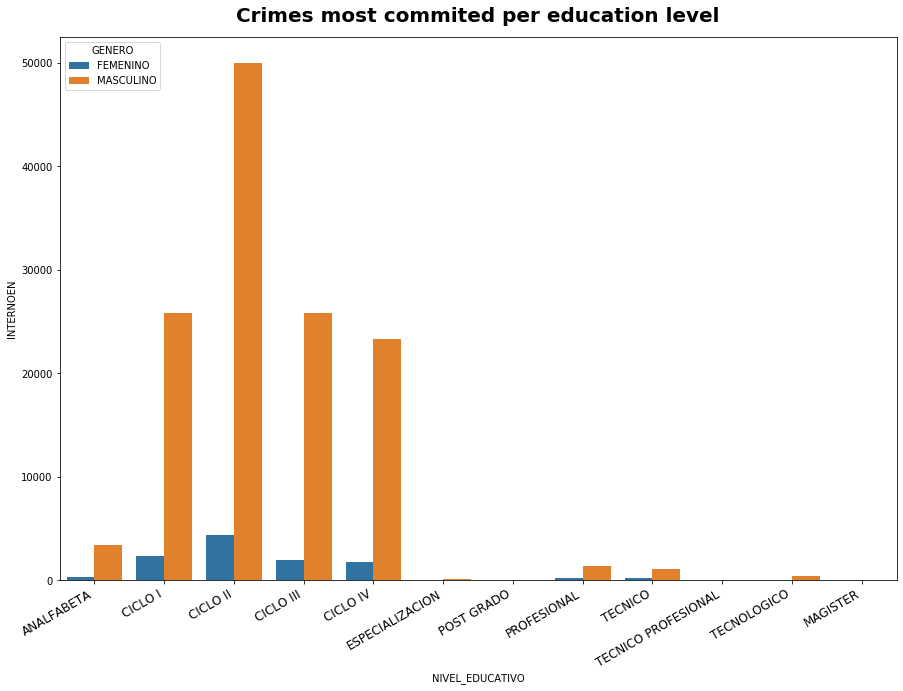

In [17]:
import seaborn as sns

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="NIVEL_EDUCATIVO", y="INTERNOEN", data=df_edu_gen, hue="GENERO", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

ax.set_title('Crimes most commited per education level', fontsize=20, fontweight='bold', pad=15)


In [82]:
import plotly.express as px

fig = px.bar(df_edu_gen, x='NIVEL_EDUCATIVO', y='INTERNOEN',
             hover_data=['GENERO','NIVEL_EDUCATIVO'], color='GENERO',
             labels={'INTERNOEN':'Amount of recidivist crimes'}, height=500, barmode='group', text="INTERNOEN")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=6, uniformtext_mode='hide')
fig.show()


In [51]:
fig = px.bar(df_genero[df_genero["GENERO"]=="MASCULINO"], x='TITULO_DELITO', y='INTERNOEN',
             hover_data=['TITULO_DELITO'], color='TITULO_DELITO',
             labels={'INTERNOEN':'Amount of recidivist crimes'}, height=400, barmode='stack', text="INTERNOEN")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=6, uniformtext_mode='hide', xaxis_tickangle=-45, showlegend=False, autosize=False,
                 width=800, height=700, margin=dict(l=50, r=50, b=100, t=100, pad=4 ))
fig.update_xaxes( tickfont=dict(family='Rockwell', color='black', size=8)) #tickangle=45,

fig.show()

In [52]:
fig = px.bar(df_genero[df_genero["GENERO"]=="FEMENINO"], x='TITULO_DELITO', y='INTERNOEN',
             hover_data=['TITULO_DELITO'], color='TITULO_DELITO',
             labels={'INTERNOEN':'Amount of recidivist crimes'}, height=400, barmode='stack', text="INTERNOEN")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=6, uniformtext_mode='hide', xaxis_tickangle=-45, showlegend=False, autosize=False,
                 width=800, height=700, margin=dict(l=50, r=50, b=100, t=100, pad=4 ))
fig.update_xaxes( tickfont=dict(family='Rockwell', color='black', size=8)) #tickangle=45,

fig.show()

In [80]:
fig = px.bar(df_genero, x='TITULO_DELITO', y='INTERNOEN',
             hover_data=["GENERO",'TITULO_DELITO'], color='GENERO',
             labels={'INTERNOEN':'Amount of recidivist crimes'}, height=400, barmode='relative', text="INTERNOEN")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=7, uniformtext_mode='hide', xaxis_tickangle=-45, showlegend=True, autosize=False,
                 width=800, height=700, margin=dict(l=50, r=50, b=100, t=100, pad=4 ))
fig.update_xaxes( tickfont=dict(family='Rockwell', color='black', size=8)) #tickangle=45,

fig.show()

In [70]:
fig = px.bar(df_geo_gen, x='DEPTO_ESTABLECIMIENTO', y='INTERNOEN',
             hover_data=["GENERO",'DEPTO_ESTABLECIMIENTO'], color='GENERO',
             labels={'INTERNOEN':'Amount of recidivist crimes'}, barmode='relative', text="INTERNOEN")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=6, uniformtext_mode='hide', xaxis_tickangle=-45, showlegend=True, autosize=False,
                 width=900, height=700, margin=dict(l=50, r=50, b=100, t=100, pad=4 ))
fig.update_xaxes( tickfont=dict(family='Rockwell', color='black', size=8)) #tickangle=45,

fig.show()

In [83]:
# g = sns.FacetGrid(df_genero, col="GENERO")
# g.map(plt.hist, "TITULO_DELITO");

# fig_dims = (15, 60)
# fig, ax = plt.subplots(4,figsize=fig_dims)

# sns.barplot(x="TITULO_DELITO", y="INTERNOEN", data=df_genero[df_genero["GENERO"]=="MASCULINO"], ax=ax[0])
# sns.barplot(x="TITULO_DELITO", y="INTERNOEN", data=df_genero[df_genero["GENERO"]=="FEMENINO"], ax=ax[1])
# sns.barplot(x="TITULO_DELITO", y="INTERNOEN", data=df_crimen, ax=ax[2])
# sns.barplot(x="DEPTO_ESTABLECIMIENTO", y="INTERNOEN", hue="GENERO", data=df_geo_gen, ax=ax[3])

# ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)
# ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)
# ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)
# ax[3].set_xticklabels(ax[3].get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

# ax[0].set_title('Crimes most commited by men', fontsize=20, fontweight='bold', pad=15)
# ax[1].set_title('Crimes most commited by women', fontsize=20, fontweight='bold', pad=15)
# ax[2].set_title('Most committed crimes', fontsize=20, fontweight='bold', pad=15)
# ax[3].set_title('Most committed crimes per gender per department', fontsize=20, fontweight='bold', pad=15)

# fig.subplots_adjust(wspace=.1, hspace=1);


# plt.set_xticklabels(rotation=45, horizontalalignment='right')
# plt.ylabel("COUNT")
# plt.title("Colors vs Values") # You can comment this line out if you don't need title
# plt.show(fig)

# sns.barplot(x = 'TITULO_DELITO', y = 'INTERNOEN', hue = 'GENERO', data = df_genero,
#             palette = 'hls',
#             order = ['MASCULINO', 'FEMENINO'],  
#             capsize = 0.05,             
#             saturation = 8,             
#             errcolor = 'gray', errwidth = 2,  
#             ci = 'sd'   
#             )

In [84]:
economic_crime = df_mj[(df_mj["TITULO_DELITO"]=="CONTRA EL PATRIMONIO ECONOMICO")].groupby(["GENERO", "DELITO"])["DELITO"].agg("count")
economic_crime = pd.DataFrame(economic_crime)
economic_crime.rename(columns={"DELITO": "COUNT"},inplace=True)
economic_crime.reset_index(inplace=True)

In [89]:
fig = px.bar(economic_crime, x='DELITO', y='COUNT',
             hover_data=["GENERO",'DELITO'], color='GENERO',
             labels={'COUNT':'Amount of recidivist economic crimes'}, barmode='relative', text="COUNT")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=6, uniformtext_mode='hide', xaxis_tickangle=-45, showlegend=True, autosize=False,
                 width=900, height=700, margin=dict(l=50, r=50, b=100, t=100, pad=4 ))
fig.update_xaxes( tickfont=dict(family='Rockwell', color='black', size=8)) #tickangle=45,

fig.show()

In [97]:
# economic_crime

# fig_dims = (15, 10)
# fig, ax = plt.subplots(figsize=fig_dims)

# sns.barplot(x="DELITO", y="COUNT", data=economic_crime, hue="GENERO", ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

# ax.set_title('Crimes against economic heritage', fontsize=20, fontweight='bold', pad=15)

In [96]:
# female_crime = df_mj[(df_mj["TITULO_DELITO"]=="CONTRA LA SALUD PUBLICA") & (df_mj["GENERO"]=="FEMENINO")]["DELITO"].value_counts()
female_crime = df_mj[(df_mj["TITULO_DELITO"]=="CONTRA LA SALUD PUBLICA")].groupby(["GENERO", "DELITO"])["DELITO"].agg("count")
female_crime = pd.DataFrame(female_crime)
female_crime.rename(columns={"DELITO": "COUNT"},inplace=True)
female_crime.reset_index(inplace=True)
# female_crime
# fig_dims = (15, 10)
# fig, ax = plt.subplots(figsize=fig_dims)

# sns.barplot(x="index", y="DELITO", data=female_crime, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

# ax.set_title('Crimes against public health committed by women', fontsize=20, fontweight='bold', pad=15)

In [98]:
fig = px.bar(female_crime, x='DELITO', y='COUNT',
             hover_data=["GENERO",'DELITO'], color='GENERO',
             labels={'COUNT':'Amount of recidivist crimes against public health'}, barmode='relative', text="COUNT")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=6, uniformtext_mode='hide', xaxis_tickangle=-45, showlegend=True, autosize=False,
                 width=900, height=700, margin=dict(l=50, r=50, b=100, t=100, pad=4 ))
fig.update_xaxes( tickfont=dict(family='Rockwell', color='black', size=8)) #tickangle=45,

fig.show()

In [22]:
df_mj[(df_mj["TITULO_DELITO"]=="CONTRA LA SALUD PUBLICA") & (df_mj["GENERO"]=="MASCULINO")]["DELITO"].value_counts()
df_mj[(df_mj["TITULO_DELITO"]=="CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL") & (df_mj["GENERO"]=="MASCULINO")]["DELITO"].value_counts()
df_mj[(df_mj["TITULO_DELITO"]=="CONTRA LA SEGURIDAD PUBLICA") & (df_mj["GENERO"]=="MASCULINO")]["DELITO"].value_counts()

# CONTRA LA VIDA
# CONTRA LA LIBERTAD INDIVIDUAL - CONTRA EL PATRIMONIO
# CONTRA LA SEGURIDAD PUBLICA
# CONTRA LA SALUD PUBLICA

FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO O MUNICIONES                                                                    16445
CONCIERTO PARA DELINQUIR                                                                                                       8709
FABRICACIÓN, TRÁFICO, PORTE O TENENCIA DE ARMAS DE FUEGO, ACCESORIOS, PARTES O MUNICIONES                                      2149
FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS                                     1748
FABRICACIÓN, TRÁFICO Y PORTE DE ARMAS, MUNICIONES DE USO RESTRINGIDO, DE USO PRIVATIVO DE LAS FUERZAS ARMADAS O EXPLOSIVOS      360
                                                                                                                              ...  
TENENCIA FABRICACION Y TRAFICO DE SUSTANCIAS U OBJETOS PELIGROSOS                                                                 2
DAÑO EN OBRAS O ELEMENTOS DE LOS SERVICIOS DE COMUNICACIONES ENERGIA Y COMBU

In [60]:
df_tent = df_mj[(df_mj.AGRAVADO == "S")] # & (df_mj.AGRAVADO == "S") & (df_mj.CALIFICADO == "S")
df_tent.groupby(["DELITO"])["INTERNOEN"].count()
# df_tent = pd.DataFrame(df_tent)
# df_tent.reset_index(inplace=True)
# fig_dims = (15, 10)
# fig, ax = plt.subplots(figsize=fig_dims)

# sns.barplot(x="index", y="DELITO", data=df_tent, ax=ax, hue)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right', fontsize = 12)

# ax.set_title('Crimes against public health committed by women', fontsize=20, fontweight='bold', pad=15)

DELITO
ABIGEATO                                                                      2
ACCESO ABUSIVO A UN SISTEMA INFORMATICO                                       2
ACCESO CARNAL ABUSIVO CON MENOR DE CATORCE AÑOS                             123
ACCESO CARNAL O ACTO SEXUAL ABUSIVOS CON INCAPAZ DE RESISTIR                 11
ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA EN INCAPACIDAD DE RESISTIR      4
                                                                           ... 
USO DE MENORES DE EDAD PARA LA COMISION DE DELITOS                           14
UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS                                   1
VIOLACION DE DATOS PERSONALES                                                 9
VIOLENCIA CONTRA SERVIDOR PUBLICO                                             1
VIOLENCIA INTRAFAMILIAR                                                     434
Name: INTERNOEN, Length: 85, dtype: int64

In [45]:
df_mj[df_mj.AGRAVADO == "S"].DELITO.unique()

array(['HOMICIDIO', 'HURTO', 'CONCIERTO PARA DELINQUIR',
       'TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES',
       'LESIONES PERSONALES', 'EXTORSION', 'FEMINICIDIO',
       'SECUESTRO SIMPLE', 'HURTO POR MEDIOS INFORMATICOS SEMEJANTES',
       'FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO O MUNICIONES',
       'ESTAFA', 'ACCESO CARNAL ABUSIVO CON MENOR DE CATORCE AÑOS',
       'ACTOS SEXUALES CON MENOR DE CATORCE AÑOS', 'REBELION',
       'DAÑOS EN LOS RECURSOS NATURALES', 'DESPLAZAMIENTO FORZADO',
       'ACTO SEXUAL VIOLENTO', 'SECUESTRO EXTORSIVO',
       'VIOLENCIA INTRAFAMILIAR',
       'FALSEDAD MATERIAL EN DOCUMENTO PUBLICO', 'RECEPTACION',
       'LESIONES CULPOSAS', 'ACCESO CARNAL VIOLENTO',
       'HOMICIDIO PRETERINTENCIONAL',
       'FABRICACIÓN, POSESIÓN Y TRÁFICO ILEGAL DE ARMAS DE FUEGO, MUNICIONES Y EXPLOSIVOS.',
       'USO DE MENORES DE EDAD PARA LA COMISION DE DELITOS',
       'FABRICACIÓN, TRÁFICO, PORTE O TENENCIA DE ARMAS DE FUEGO, ACCESORIOS, PARTES O MUNI

In [44]:
df_mj[df_mj.CALIFICADO == "S"].DELITO.unique()

array(['HURTO', 'ABUSO DE CONFIANZA',
       'HURTO POR MEDIOS INFORMATICOS SEMEJANTES',
       'FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO O MUNICIONES',
       'TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES',
       'CONSTREÑIMIENTO ILEGAL', 'CONCIERTO PARA DELINQUIR', 'HOMICIDIO',
       'EXTORSION', 'ACTOS SEXUALES CON MENOR DE CATORCE AÑOS',
       'LESIONES PERSONALES', 'HURTO DE HIDROCARBUROS O SUS DERIVADOS',
       'VIOLENCIA INTRAFAMILIAR', 'SECUESTRO EXTORSIVO',
       'SECUESTRO SIMPLE',
       'FABRICACIÓN, TRÁFICO, PORTE O TENENCIA DE ARMAS DE FUEGO, ACCESORIOS, PARTES O MUNICIONES',
       'VIOLENCIA CONTRA SERVIDOR PUBLICO',
       'USO DE MENORES DE EDAD PARA LA COMISION DE DELITOS',
       'FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS',
       'FALSEDAD MATERIAL DE PARTICULAR EN DOCUMENTO PUBLICO',
       'ACTO SEXUAL VIOLENTO', 'ACCESO CARNAL VIOLENTO'], dtype=object)